In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jul 25 2017

@author: Nicolas Loffreda

Module to read all the images located on a particular folder, convert them to
an np array, flatten them and put them together on an np Array format to use as
Data Matrix (Feature Vector)
"""

import os
import numpy as np
from PIL import Image
import pylab as pl

def readImages(path, chk_shape=(50, 50)):
    '''
    Read all images from a directory and return an np Array X to use
    as data matrix (Feature Vectors).
    The function will also check for a specific shape and raise an error if 
    dimensions don't match what's expected (usually 50x50, but can be changed)
    
    Parameters & Return
    ----------
    :param path: Path where the images are located
    :param chk_shape: Tuple (1x2) to check image shape
    :return X: Data matrix with each image on a flattened format
    
    Example
    -----------
    :Example:
        
    >> X = readImages("./imgs", chk_shape=(145,148))
    >> X = readImages("./imgs")
    '''
    # Read Images
    images = list()
    labels = list()
    for img in os.listdir(path):
        if img.endswith(".png") or img.endswith(".jpg"):
            im = Image.open(os.path.join(path, img))
            im_grey = im.convert('L')
            im_array = np.array(im_grey)
            if im_array.shape != chk_shape:
                raise ValueError('{} doesnt have the expected dim {}, {} instead'.format(img, chk_shape, im_array.shape))
            images.append(im_array)
            # obtain class value
            class_id = int(img.split('_')[0].lstrip('c'))
            labels.append(class_id)
            
    # Flatten the images and append to Data matrix
    flatimages = list()
    for i in images:
        flatimages.append(i.ravel())
    X = np.asarray(flatimages)
    y = np.asarray(labels)
    return X, y


def plotImages(*args, dm=(50, 50)):
    '''
    Plot one or multiple images from the X matrix. Takes flatten images as input, 
    so need to set up the width and length to re-shape the vector image if different
    than 50x50. This will be set up as 
    
    Examples
    -------------
    :Example:
        
    >> plotImages(X[0], dm=(145, 148))
    >> plotImages(X[100])
    '''
    n = len(args)
    fig = pl.figure()
    for i,arg in enumerate(args):
        pl.subplot(1, n, i+1)
        pl.imshow(arg.reshape(dm[0], dm[1]), interpolation='None', cmap=pl.get_cmap('gray'))
        pl.axis('off')
    fig.tight_layout(pad=0)
    pl.show()

Class labels:
Priyanka Deo 0
Weiya Jiang 1
Nicolas Loffreda 2
Krupa Masilamani 3
Mukul Sharma 4
Laura Ye 5

In [2]:
path = r'C:\Users\Vicky\Documents\berkeley_ext_course\intro_to_ML_using_python\final_project_test\all_data'

In [3]:
# import image data and labels
X, y = readImages(path, chk_shape=(50, 50))

In [4]:
X.shape, y.shape

((392, 2500), (392,))

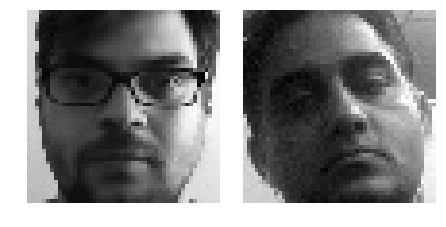

image1 label:  2
image2 label:  4


In [5]:
# verify images and labels
plotImages(X[100], X[200])
print ("image1 label: ", y[100])
print ("image2 label: ", y[200])

In [6]:
"""
@author: Nicolas Loffreda
@date: 6/24/2017

Code to apply Principal Component Analysis (PCA) to a feature matrix
"""
import numpy as np
import matplotlib.pyplot as plt

def applyPCA(X, components=2, return_code='P'):
    '''
    Calculate the PCA of a feature matrix.
    Can be controled to set the number of PCA components we want to use.
    Will return P Matrix with dimension N x components
    '''
    if type(X) != np.ndarray:
        raise TypeError('Type of X must be a numpy array')
    if components > X.shape[1]:
        raise ValueError("Number of components can't be more than the number of features: " + str(X.shape[1]))
        
    # Normalize Feature Vector: Z
    mean_vec = X.mean(axis=0)
    Z = X - mean_vec

    # Covariance Matrix: C
    C = np.cov(X, rowvar=False)
    
    # EigenVectors: V
    eigvals, V = np.linalg.eigh(C)
    eigvals=np.flipud(eigvals)
    V=np.flipud(V.T)
    V = V[:components]
    
    # Principal Components matrix: P
    P = np.dot(Z,V.T)
    
    # Recuperated Matrix: X_Rec
    X_rec = np.dot(P, V) + mean_vec
    
    if return_code == 'P':
        return P
    if return_code == 'PX':
        return P, X_rec
    elif return_code == 'all':
        return mean_vec, Z, C, P, V, X_rec, eigvals
    else:
        raise ValueError('Invalid return code: P, PX, all')
        
def eigvalsGraph(X, plot_comp=0):
    '''
    This function will calculate the eigvals variance contribution
    for a feature matrix and plot it
    '''
    if type(X) != np.ndarray:
        raise TypeError('Type of X must be a numpy array')
        
    # ToDo: Check that the sum of negative eigvals is not significant
    
    C = np.cov(X, rowvar=False)
    eigvals, V = np.linalg.eigh(C)
    eigvals_sum = sum(eigvals)
    eigvals_flip=np.flipud(eigvals)
    eigvals_partial_sum = 0
    eigvals_var_explain = []
    
    for i in eigvals_flip:
        eigvals_partial_sum += i
        eigvals_var_explain.append(eigvals_partial_sum)
        
    eigvals_var_explain = np.array(eigvals_var_explain)
    eigvals_var_explain = eigvals_var_explain / eigvals_sum
    ind = [i+1 for i in range(np.alen(eigvals_flip))]
    
    if plot_comp == 0:
        plt.plot(ind, eigvals_var_explain)
        plt.show()
    else:
        plt.plot(ind[:plot_comp], eigvals_var_explain[:plot_comp])
        plt.show()

In [7]:
# PCA
_, _, _, P, V, _, eigvals = applyPCA(X, components=2, return_code='all')

In [8]:
# percentage variance retained in the first two components
np.sum(eigvals[:2])/np.sum(eigvals)

0.7125646043670214

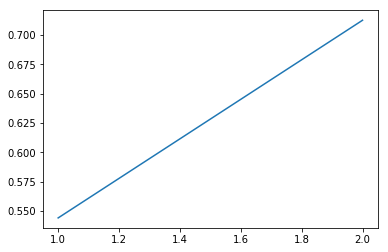

In [9]:
eigvalsGraph(X, plot_comp=2)

In [10]:
% matplotlib inline

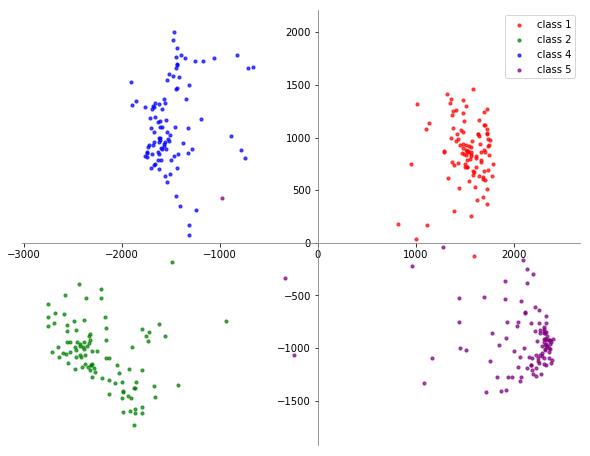

In [11]:
class_ids = [1,2,4,5]
colors = ['red', 'green', 'blue', 'purple']
# plot first 2 principle components
plt.figure(figsize=(10,8))
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['bottom'].set_color('gray')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.spines['left'].set_color('gray')
for i in np.arange(len(class_ids)):
    plt.scatter(P[:,0][y==class_ids[i]], P[:,1][y==class_ids[i]], c=colors[i], s = 10, label = "class %i"%class_ids[i], alpha=0.7)
ax.legend()
plt.show()

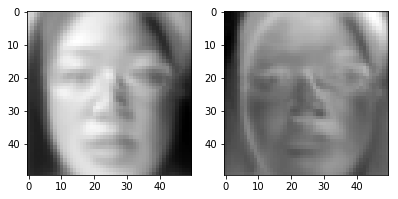

In [12]:
# plot first 2 eigenfaces
plt.figure(figsize=(10,8))
for i in np.arange(2):
    plt.subplot(2,3,i+1)
    plt.imshow(V[i,:].reshape(50,50), cmap='gray')
plt.show()

In [17]:
# split test and training data
def train_test_split(X, y, test_size=None, random_state=None):
    """
    Input:
    -X: data, with shape (N, d)
    -y: label, with shape (N, )
    -test_size: float. 0-1
    -random_state: define randome state, for reproducing same random sequence. int   
    """
    if random_state == None:
        random_state = 42
    if test_size == None:
        test_size = 0.25
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    
    test_size = int(len(X)*test_size)
    test_ind = indices[:test_size]
    train_ind = indices[test_size:]
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_test, y_test = X[test_ind], y[test_ind]
    return X_train, y_train, X_test, y_test


In [18]:
X_train, y_train, X_test, y_test = train_test_split(P, y, test_size=0.25, random_state=42)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(294, 2) (294,) (98, 2) (98,)


In [22]:
# count the number of each class in the training set
from collections import Counter
Counter(y_train)

Counter({1: 70, 2: 69, 4: 75, 5: 80})